# Unicorn Companies EDA

## Objective
* Determine the number of companies founded each year
* The time it tooked industries to attain unicorn status
* The maximum valuation per industry
* Average valuation of companies that attained unicorn status in 2020 vs 2021
* Top countries by 10 Valuation

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings # will remove wornings.

In [2]:
warnings.simplefilter('ignore')

In [3]:
# Read in the dataset

df = pd.read_csv('Unicorn_Companies.csv')

df.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
# Check the shape of the data

df.shape

(1074, 10)

In [5]:
# Check the dataframe inofrmations

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [6]:
# Check for duplicates

df.duplicated().sum()

0

In [7]:
# check for duplicated companies
df.Company.duplicated().sum()

1

* The dataset has 10 columns(index column not counted), and 1074 rows
* It contains missing data on `City` and `Selected Investors`
* The `Date Joined` is an object datatype, will cast it to a date datatype
* The dataset has 1 duplicated company

## Cleaning the dataset

In [8]:
# Make a copy of the df

uc = df.copy()

In [9]:
print('Count of duplicated rows')
print(uc.Company.duplicated().sum())
print('')
uc.drop_duplicates(subset='Company', inplace= True)
print('Count of duplicates after dropping')
print(uc.Company.duplicated().sum())

Count of duplicated rows
1

Count of duplicates after dropping
0


In [10]:
# Check for nulls values

uc.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [11]:
# drop rows with null values
uc.dropna(axis= 0, inplace= True)
uc.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country/Region      0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [12]:
# Convert dat join from object to date
uc['Date Joined'] = pd.to_datetime(uc['Date Joined'])
uc.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

Create a `Year Joined`, for when companies attained unicorn status, and remove '$B' from `Valuation` and change it ton int

In [13]:
uc['Year Joined'] = uc['Date Joined'].dt.year
uc.Valuation = uc.Valuation.str.strip('$B').astype('int')

In [14]:
uc.dtypes

Company                     object
Valuation                    int32
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
Year Joined                  int32
dtype: object

In [15]:
uc.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",2019
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2017
9,Databricks,38,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",2019


## What is the number of companies founded per year

In [16]:
uc['Year Founded'].value_counts().sort_values(ascending= False)

Year Founded
2015    151
2016    109
2014    106
2012     94
2013     85
2011     81
2017     74
2018     59
2019     44
2010     39
2009     34
2008     27
2020     24
2007     23
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2003      8
2004      8
1998      5
2002      4
1995      2
1994      2
1996      1
1919      1
1979      1
1992      1
1991      1
1990      1
1984      1
1993      1
1997      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of companies founded earh year')

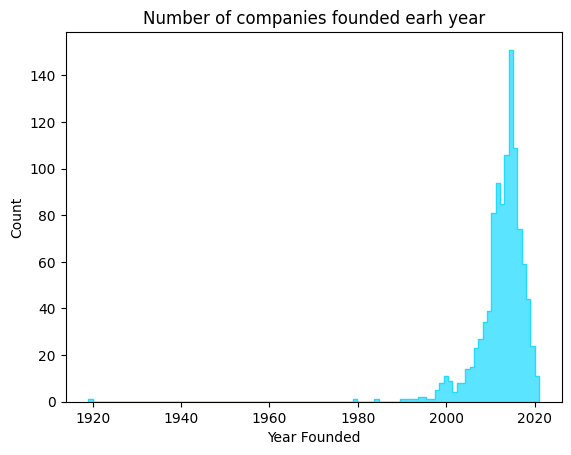

In [17]:
sns.set_palette('cool')
sns.histplot(x= uc['Year Founded'], element= 'step')
plt.title('Number of companies founded earh year')

* Most companies were founed between 2011- 2017

## How long did it take each industries to attain unicorn?

In [18]:
# create a column for the time it took to attain unicorn status
uc['Year To Unicorn']= uc['Year Joined'] - uc['Year Founded']

In [19]:
# Check the unique industries in this dataset
uc.Industry.unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

In [20]:
# There 2 field for artitificial intelligence
# Merge the 2 fields into one

corrected_name= {'Artificial intelligence':'Artificial Intelligence'}
uc.Industry= uc.Industry.replace(corrected_name)
uc.Industry.unique()

array(['Artificial Intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications'], dtype=object)

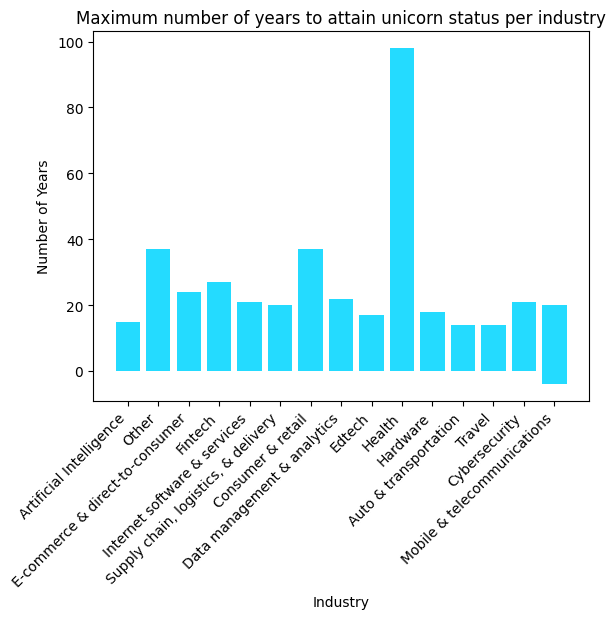

In [21]:
plt.bar(data= uc, x= 'Industry', height= 'Year To Unicorn')
plt.title('Maximum number of years to attain unicorn status per industry')
plt.ylabel('Number of Years')
plt.xlabel('Industry')
plt.xticks(rotation= 45, horizontalalignment= 'right')
plt.show()

* The result is the sum of companies per industries
* The high number of years to attain unicorn status is due to the facts some of the companies were founded back in the 19** and attained unicorn status in the 20**

In [22]:
uc[uc['Industry']=='Health'].sort_values(by= 'Year Founded')

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Year To Unicorn
189,Otto Bock HealthCare,4,2017-06-24,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners,2017,98
1043,Thirty Madison,1,2021-06-02,Health,New York,United States,North America,1993,$210M,"Northzone Ventures, Maveron, Johnson & Johnson...",2021,28
211,Intarcia Therapeutics,4,2014-04-01,Health,Boston,United States,North America,1995,$1B,"New Enterprise Associates, New Leaf Venture Pa...",2014,19
79,Caris Life Sciences,8,2021-05-12,Health,Irving,United States,North America,1996,$1B,"Sixth Street Partners, OrbiMed Advisors, Highl...",2021,25
736,InSightec,1,2020-03-06,Health,Tirat Carmel,Israel,Asia,1999,$633M,"York Capital Management, GE Healthcare, Koch D...",2020,21
...,...,...,...,...,...,...,...,...,...,...,...,...
784,Prime Medicine,1,2021-07-13,Health,Cambridge,United States,North America,2019,$315M,"Newpath Partners, Google Ventures, F-Prime Cap...",2021,2
884,Cadence,1,2021-12-14,Health,New York,United States,North America,2020,$141M,"Thrive Capital, General Catalyst, Coatue Manag...",2021,1
613,EQRx,1,2021-01-11,Health,Cambridge,United States,North America,2020,$700M,"Nextech Invest, Casdin Capital, Google Ventures",2021,1
151,Cerebral,5,2021-06-10,Health,San Francisco,United States,North America,2020,$462M,"Oak HC/FT Partners, Artis Ventures, WestCap Group",2021,1


## Maximum companies valuation per industry

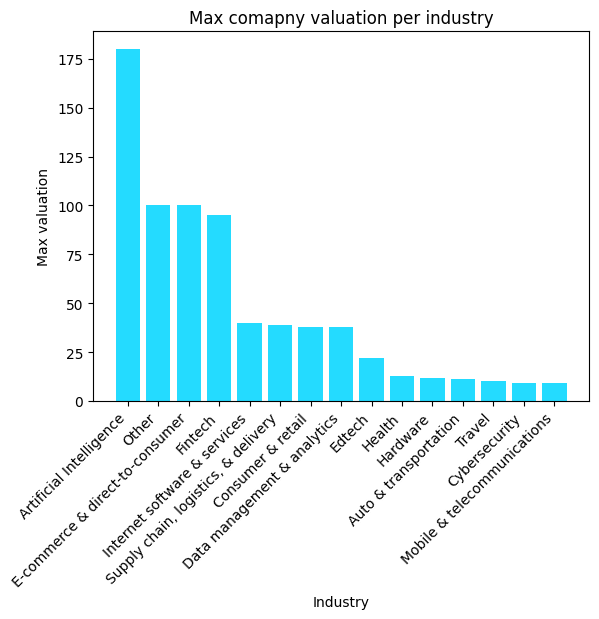

In [23]:
plt.bar(uc.Industry, uc.Valuation)
plt.title('Max comapny valuation per industry')
plt.xlabel('Industry')
plt.ylabel('Max valuation')
plt.xticks(rotation = 45, horizontalalignment= 'right')
plt.show()

`Artificial Inteligence` is the most valued industry

## Time to attain unicorn status per year founded

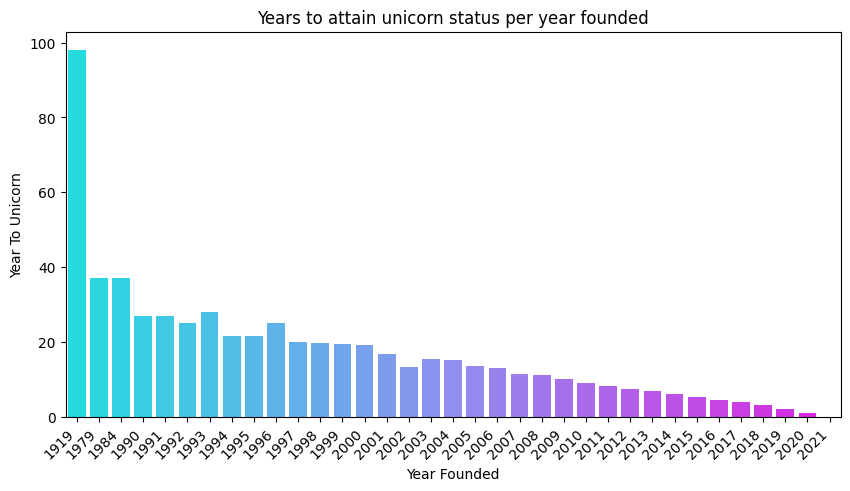

In [24]:
plt.figure(figsize= (10, 5))
sns.barplot(data= uc, x= 'Year Founded', y='Year To Unicorn', errorbar= ('ci', False), palette= 'cool')
plt.title('Years to attain unicorn status per year founded')
plt.xticks(rotation= 45,horizontalalignment= 'right');

It takes newer companies less time to attain unicorn statust

## Average `Valuation` of companies that attained unicorn status in 2020 vs 2021

In [25]:
# Create a new df with data Filtered to  companies that attained unicorn status in 2020, and 2021
year= [2020, 2021]

uc_20_21=  uc[uc['Year Joined'].isin(year)]

# Create a new fields for quarters which will be used to to compared, valueation between the 2 dates.

uc_20_21['Quarter Joined']= uc_20_21['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q')

In [26]:
uc_20_21.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Year To Unicorn,Quarter Joined
16,J&T Express,20,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",2021,6,2021-Q2
22,Genki Forest,15,2020-03-01,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",2020,4,2020-Q1
23,goPuff,15,2020-10-08,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",2020,7,2020-Q4
24,Blockchain.com,14,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",2021,10,2021-Q1
27,OpenSea,13,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2021,4,2021-Q3


In [27]:
uc_20_21.groupby(['Year Joined'], as_index=False).agg({'Company': 'count'}).rename(columns={'Company': '# of companies'})

,Year Joined,# of companies
0,2020,107
1,2021,506


More companies attained unicorn status in 2021 than in 2020

In [28]:
# Average valuation per quarter joined between 2020 and 2021
company_by_quarter_20_21 = round(uc_20_21.groupby(['Quarter Joined'], as_index= False).agg({'Valuation':'mean'}).rename(columns={'Valuation': 'Avg Valuation'}), 2)
company_by_quarter_20_21

,Quarter Joined,Avg Valuation
0,2020-Q1,3.44
1,2020-Q2,3.76
2,2020-Q3,3.90
3,2020-Q4,3.70
4,2021-Q1,2.77
5,2021-Q2,2.35
6,2021-Q3,2.10
7,2021-Q4,1.79


* After Q4 2020, companies have been getting lower valuation

In [29]:
round(uc_20_21.groupby(['Year Joined'], as_index= False).agg({'Year To Unicorn':'mean'}).rename(columns={'Year To Unicorn': 'Avg Time To Unicorn'}), 2)

,Year Joined,Avg Time To Unicorn
0,2020,7.60
1,2021,6.82


Companies that attained unicorn status in 2020 took longer to attain it than companies that attained unicorn status in 2021

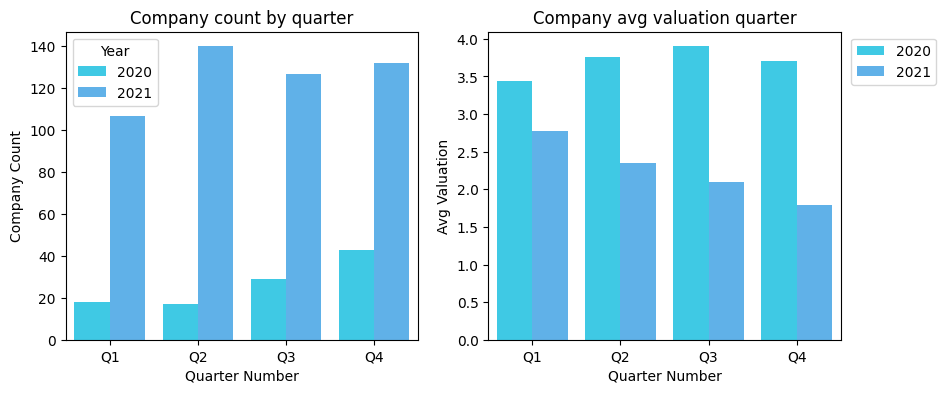

In [30]:
# seperate year and quarter from company_by_quarter_20_21
company_by_quarter_20_21['Quarter Number']= company_by_quarter_20_21['Quarter Joined'].str[-2:]
company_by_quarter_20_21['Year']= company_by_quarter_20_21['Quarter Joined'].str[:4]
company_by_quarter_20_21['Company Count']= uc_20_21.groupby(['Quarter Joined'], as_index= False).agg({'Company': 'count'}).drop(columns=['Quarter Joined'])

#Create 2 bar char to compare number of companies that attained unicorn status per quarter, and average valuation per quarter between 2020 and 2021
fig, axes= plt.subplots(1,2, figsize= (10,4))

sns.barplot(data=company_by_quarter_20_21, 
            x= 'Quarter Number', 
            y= 'Company Count', 
            hue= 'Year',
            errorbar= ('ci', False),
            ax= axes[0])
axes[0].set_title('Company count by quarter')

sns.barplot(data=company_by_quarter_20_21, 
            x= 'Quarter Number', 
            y= 'Avg Valuation', 
            hue= 'Year',
            errorbar= ('ci', False),
            ax= axes[1])
axes[1].set_title('Company avg valuation quarter')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()


## Result
* More companies attained unicorn status in 2021, but had a lower valuation compared to 2020
* There was a trend of valuation increase from Q1 to Q3 for 2020 and the opposite for 2021
* Q3 2020 was the quarter with the highest average valutaion of companies that attained unicorn status, followed with a decrease in valuation going into 2021

## Top countries by sum of valutation

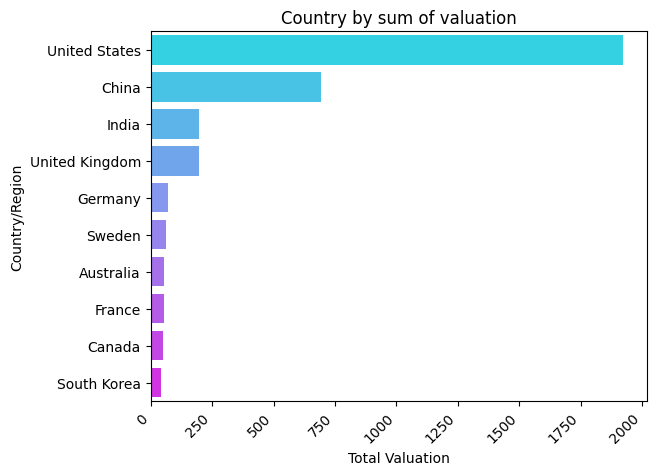

In [31]:
# Fine the sum of valuation and aggregate it to Country/Region
top_n_country= uc.groupby(['Country/Region'], as_index= False).agg({'Valuation': 'sum'}).rename(columns= {'Valuation': 'Total Valuation'}).sort_values(by= 'Total Valuation', ascending= False)

sns.barplot(data= top_n_country.head(10), y= 'Country/Region', x= 'Total Valuation', palette= 'cool')
plt.title('Country by sum of valuation')
plt.xticks(rotation= 45, horizontalalignment= 'right')
plt.show()

The United States is dominating the chart, follow by China, India, United Kingdom

Lets consider them as outliers and exclude them, cand compare the rest

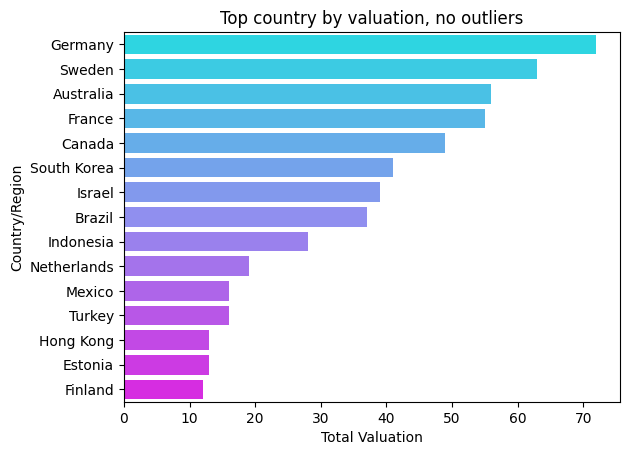

In [32]:
# Filter out 'United States', 'China', 'India', and 'United Kingdom'
top_countries= ['United States', 'China', 'India', 'United Kingdom']
uc_outliers_removed= top_n_country[~top_n_country['Country/Region'].isin(top_countries)]

sns.barplot(data= uc_outliers_removed.head(15), y= 'Country/Region', x= 'Total Valuation', palette='cool')
plt.title('Top country by valuation, no outliers')
plt.show()




In [33]:
px.scatter_geo(uc_outliers_removed.head(15),
               locations= 'Country/Region',
               size= 'Total Valuation',
               locationmode= 'country names',
               color= 'Country/Region')

In [34]:
uc['Industry'].nunique()

15

## Who are the Top 3 Investors?

In [35]:
# Unnest 'Select Investors'
# count the number of company each investors is invested in
top_investors= uc[['Company', 'Select Investors']].set_index('Company').apply(lambda x: x.str.split(',').explode()).reset_index()[
    'Select Investors'
].value_counts().sort_values(ascending=False)

In [36]:
top_investors

Select Investors
 Tiger Global Management    39
 Accel                      31
 Sequoia Capital            30
Sequoia Capital China       28
Accel                       28
                            ..
B Capital Group              1
 GE Ventures                 1
 BECO Capital                1
 McKesson Ventures           1
 Causeway Media Partners     1
Name: count, Length: 1505, dtype: int64

Top 3 investors are
* `Tiger Global Management`
* `Accel`
* `Sequoia Capital`

## Distribution of investment by top 3 Investors

In [37]:
# Create a dummy variable that denotes if top 3 investors are invested in a company

# For 'Tiger Global Management'
uc['Tiger Global Management']= uc['Select Investors'].str.contains('Tiger Global Management').astype(int)

# For 'Accel'
uc['Accel']= uc['Select Investors'].str.contains('Accel').astype(int)

# For 'Sequoia Capital'
uc['Sequoia Capital']= uc['Select Investors'].str.contains('Sequoia Capital').astype(int)

uc.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Year To Unicorn,Tiger Global Management,Accel,Sequoia Capital
0,Bytedance,180,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,5,0,0,1
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,10,0,0,0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,10,1,0,1
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,4,0,0,0
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,6,0,0,1


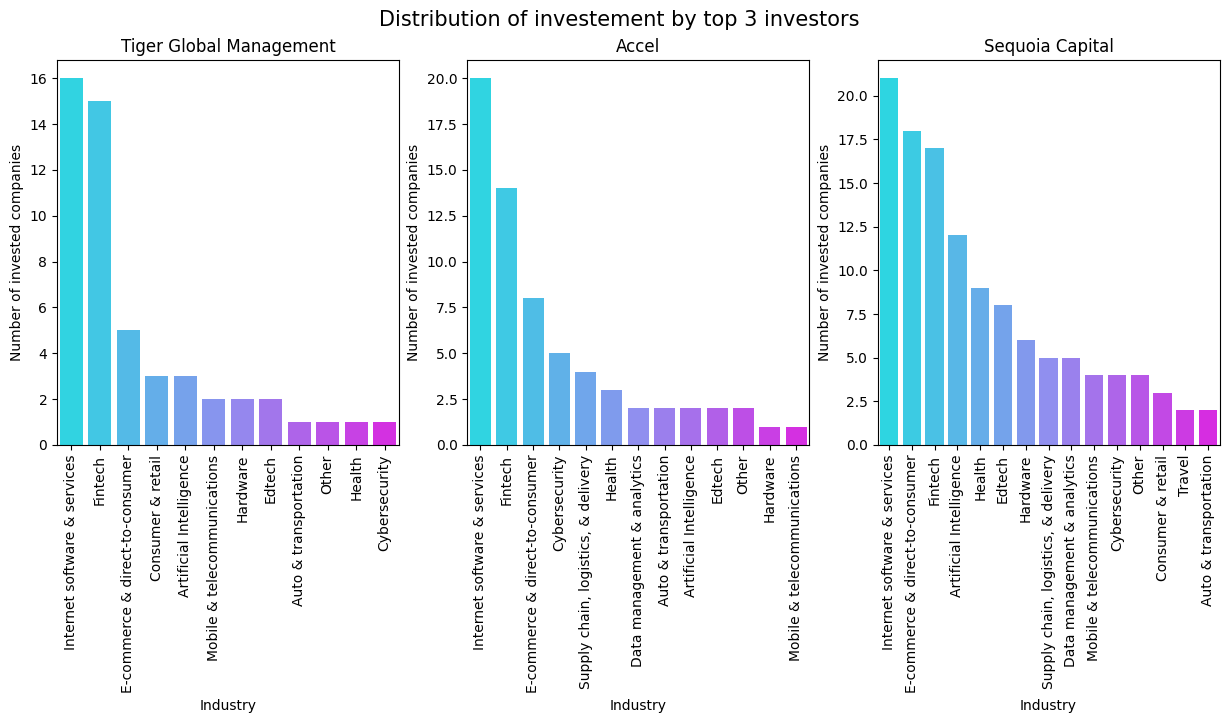

In [38]:
# Create 3 bar plots for the distribution of investment by the top 3 investors
fig, axes= plt.subplots(1,3, figsize= (15, 5))
idx= 0

for i in ['Tiger Global Management', 'Accel', 'Sequoia Capital']:
    x= uc[uc[i]== 1]
    x= x.Industry.value_counts().sort_values(ascending= False)
    
    sns.barplot(x= x.index,
                y= x.values,
                ax= axes[idx],
                palette= 'cool')
    axes[idx].set_title(i)
    axes[idx].set_ylabel('Number of invested companies')
    axes[idx].set_xlabel('Industry')
    axes[idx].set_xticklabels(x.index, rotation = 90)
    
    idx +=1
plt.suptitle('Distribution of investement by top 3 investors', fontsize= 15)
plt.show()

The top 3 investing firms are mostly invested
* `Internet software & services`
* `Fintech`
* `E-commerce & direct-to-consumer`

`Tiger Global Management` is the only top unicorn investor to not invest in supply chain and logistics.

`Accel` has invested in more cybersecurity unicorns then the `Tiger Gloabl Managemen` and `Sequoia Capital`

`Sequoia Capital` is the only top 3 investing firm to invest in travel unicorns

## Continents of unicorns invested in by the top 3 investors

In [39]:
print('Number of uniques continents')
print(uc.Continent.nunique())
print('Continents:')
print(uc.Continent.unique())

Number of uniques continents
6
Continents:
['Asia' 'North America' 'Europe' 'Oceania' 'South America' 'Africa']


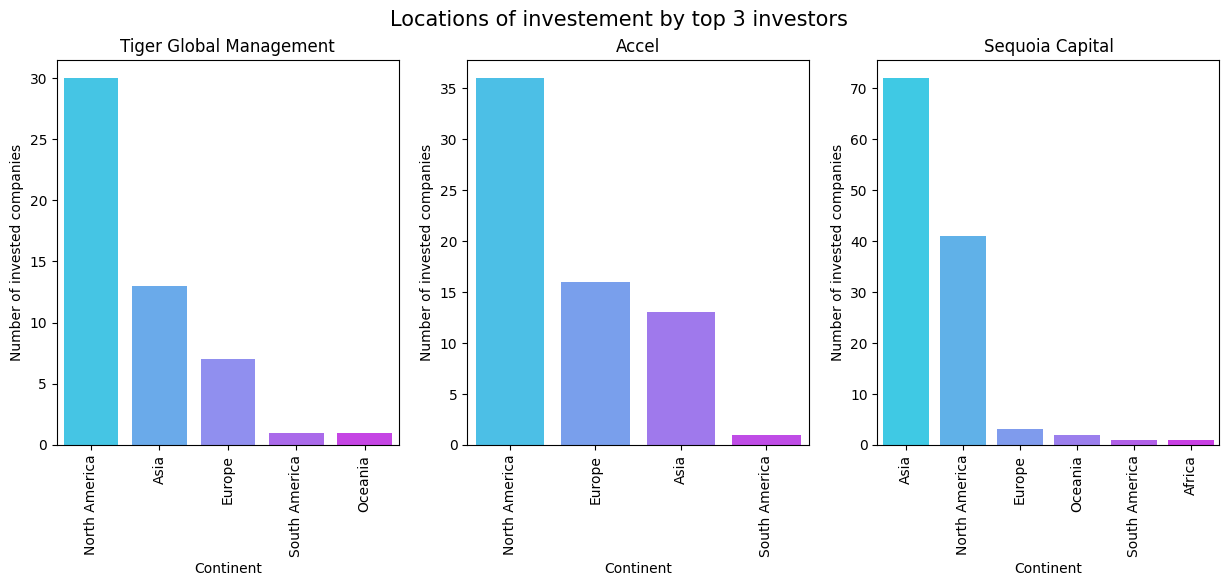

In [40]:
fig, axes= plt.subplots(1,3, figsize= (15,5))
idx= 0

for i in ['Tiger Global Management', 'Accel', 'Sequoia Capital']:
    x= uc[uc[i]== 1]
    x= x.Continent.value_counts()
    
    sns.barplot(x= x.index,
                y= x.values,
                ax= axes[idx],
                palette= 'cool')
    axes[idx].set_title(i)
    axes[idx].set_ylabel('Number of invested companies')
    axes[idx].set_xlabel('Continent')
    axes[idx].set_xticklabels(x.index, rotation = 90)
    
    idx +=1
plt.suptitle('Locations of investement by top 3 investors', fontsize= 15)
plt.show()
    


Add Africa, and Oceania to `Accel` and Africa to `Tiger Global Management`

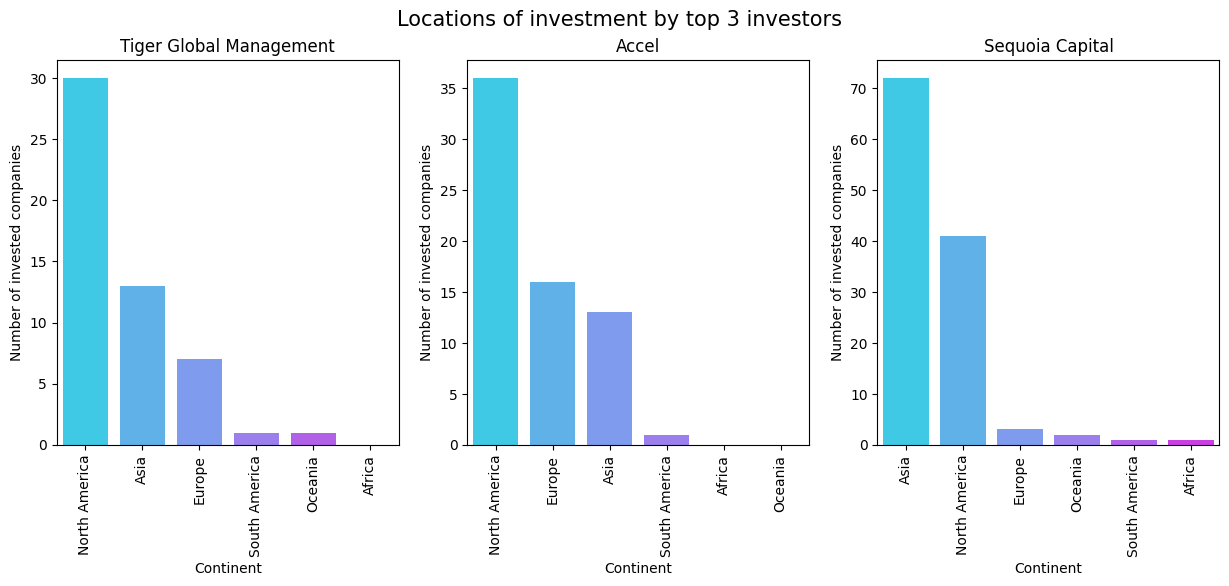

In [41]:
fig, axes= plt.subplots(1,3, figsize= (15, 5))
idx= 0

for i in ['Tiger Global Management', 'Accel', 'Sequoia Capital']:
    x= uc[uc[i]== 1]
    x= x.Continent.value_counts()
    
    if 'Africa' not in x.index:
        x['Africa']= 0
    if 'Oceania' not in x.index:
        x['Oceania']= 0
    
    sns.barplot(x= x.index,
                y= x.values,
                ax= axes[idx],
                palette= 'cool')
    axes[idx].set_title(i)
    axes[idx].set_xlabel('Continent')
    axes[idx].set_ylabel('Number of invested companies')
    axes[idx].set_xticklabels(x.index, rotation= 90)
    
    idx +=1
plt.suptitle('Locations of investment by top 3 investors', fontsize= 15)
plt.show()

`Sequoia Capital` is the only top 3 to investor to invest in all of the continents, and mostly invested in unicorns in Asia

Both `Tiger Globa Management` and `Accel` are not invested in unicorns in Africa

## Average years to unicorn for companies invested in by the top 3 investors

In [42]:
uc.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Year To Unicorn,Tiger Global Management,Accel,Sequoia Capital
0,Bytedance,180,2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,5,0,0,1
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,10,0,0,0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,10,1,0,1
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,4,0,0,0
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,6,0,0,1


In [48]:
# Mean years to unicorn for 'Tiger Global Management'
print('Avg years to unicorn for Tiger Global Management:')
print(round(uc[uc['Tiger Global Management']== 1]['Year To Unicorn'].mean(), 1), 'years')

# Mean years to unicorn for 'Accel'
print('Avg years to unicorn for Accel:')
print(round(uc[uc['Accel']== 1]['Year To Unicorn'].mean(), 1), 'years')

# Mean year to unicorn for 'Sequoia Capital'
print('Avg years to unicorn for Sequoia Capital:')
print(round(uc[uc['Sequoia Capital']== 1]['Year To Unicorn'].mean(), 1), 'years')

Avg years to unicorn for Tiger Global Management:
7.3 years
Avg years to unicorn for Accel:
6.9 years
Avg years to unicorn for Sequoia Capital:
6.5 years


On average, companies invested in by `Sequoia Capital` attained unicorn status faster compared to companies invested in by `Tiger Global Management` and `Accel`

## Top 3 companies with highest valuation for the top 3 investing firms

In [44]:
# sort the df in descending order by valuation
uc = uc.sort_values(by= 'Valuation', ascending= False)

# top 3 valued companies invested in by 'Tiger Global Management'
print('Highest valued unicorns invested in by Tiger Global Management:')
print(uc[uc['Tiger Global Management']==1]['Company'].values[:3])
print('')
# top 3 valued companies invested in by 'Accel'
print('Highest valued unicorns invested in by Accel:')
print(uc[uc['Accel']==1]['Company'].values[:3])
print('')
# top 3 valued companies invested in by 'Sequoia Capital'
print('Highest valued unicorns invested in by Sequoia Capital:')
print(uc[uc['Sequoia Capital']==1]['Company'].values[:3])

Highest valued unicorns invested in by Tiger Global Management:
['SHEIN' 'Checkout.com' 'JUUL Labs']

Highest valued unicorns invested in by Accel:
['Miro' 'goPuff' 'Celonis']

Highest valued unicorns invested in by Sequoia Capital:
['Bytedance' 'SHEIN' 'Klarna']


The companies with the highest valuation by `Tiger Global Management` are:
* SHEIN, Checkout.com, and JUUL Labs 

The companies with the highest valuation by `Accel` are:
* Moro, goPuff, and Celonis

The companies with the highest valuation by `Sequoia Capital` are: 
* Bytedance, SHEIN, and Klarna

## Companies with 2 or more top 3 investors

In [45]:
# create a column that contanin the total number of investors(top 3 only)
uc['Top 3 Investors'] = uc['Tiger Global Management'] + uc['Accel'] + uc['Sequoia Capital']

# Filter to only companies with more then 2 top 3 investors
top_company= uc[uc['Top 3 Investors']>= 2]


print('Number of companies with 2 or more top investors:')
print(len(top_company[top_company['Top 3 Investors']>= 2]['Company'].values))
print('')
print(top_company[top_company['Top 3 Investors']>= 2]['Company'].values)

Number of companies with 2 or more top investors:
18

['SHEIN' 'Getir' 'Razorpay' 'DJI Innovations' 'Ola Cabs' 'CRED'
 'ChargeBee Technologies' 'Ironclad' 'Groww' 'Infra.Market' 'Zetwerk'
 'Ethos' 'CoinSwitch Kuber' 'Veriff' 'Zenoti' 'Vedantu'
 'Five Star Business Finance' 'CaptivateIQ']


There are 18 companies with 2 or more top investing firms

# Summary
* Sequoia Capital, Tiger Global Management, and Accel invest in several industries, but the majority of investments are in internet software and services, fintech, and e-commerce and direct-to-consumer companies.
* Sequoia Capital has a stronger focus on unicorn companies in Asia than the other top unicorn investors. The majority of unicorns invested in by Tiger Global Management and Accel are in North America.
* The companies invested in by Sequoia Capital reached unicorn status faster than those invested in by Tiger Global Management and Accel, at an average of 6.6 years between founding and reaching unicorn status.
* There are 18 companies invested in simultaneously by two of the top three unicorn investment firms.
* The highest-valued unicorns invested in by Sequoia Capital are Bytedance, SHEIN, and Klarna. The highest-valued unicorns invested in by Tiger Global Management are SHEIN, Checkout.com, and JUUL Labs. The highest-valued unicorns invested in by Accel are Miro, goPuff, and Celonis.
 